In [270]:
from funcoesTermosol import *
import numpy as np
import math
import tqdm

In [271]:
L = 5

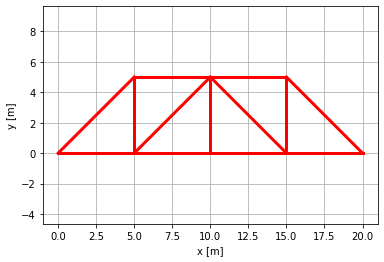

In [272]:
entrada = "trelica.xlsx"

[nn,N,nm,Inc,nc,F,nr,R] = importa(entrada)

plota(N, Inc)
# geraSaida()

In [273]:
#numero de nodes
n = 8
nodes = np.zeros((2, n))
print(nodes)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [274]:
row_one = N[0]
row_two = N[1]
row_one_index = []
row_two_index = []
index_row_one = 0
index_row_two = 0
node_atual = nn
for i in range(1, node_atual+1):
    row_one_index.append(node_atual - i)
    row_two_index.append(node_atual - i)
print(row_one_index)
print(row_two_index)

[7, 6, 5, 4, 3, 2, 1, 0]
[7, 6, 5, 4, 3, 2, 1, 0]


___
**Fincas**

[[-1 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 -1 -1  0 -1  0  0  0  0  0  0  0]
 [ 0  1  1  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0 -1 -1  0 -1  0  0  0]
 [ 0  0  0  0  0  1  1  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0 -1 -1  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1]]


In [275]:
def matriz_conectividade(numero_do_membro, incidencia, numero_de_elementos):
    """
    função que calcula a matriz de conectividade de um elemento específico
    recebe: número do elemento [inteiro] e a matriz de incidência lida do excel [matriz]
    retorna: conectividade [lista]
    """
    
    conectividade = numero_de_elementos*[0]
    
    # O numero do membro-1 é a linha a matriz que eu tenho que utilizar
    no_1 = int(incidencia[numero_do_membro-1, 0])
    no_2 = int(incidencia[numero_do_membro-1, 1])
    
    conectividade[no_1-1] = -1
    conectividade[no_2-1] = 1

    return conectividade

In [276]:
def conec_global_T(incidencia, num_membros, num_nos):
    """
    função responsável por devolver a matriz de conectividade global
    recebe: número de nós [inteiro], matriz de incidencia [matriz]
    retorna: matriz onde cada linha é uma conectividade de um membro [matriz]
    """
  
    C = []
    for i in range(num_membros):
        C.append(matriz_conectividade(i+1, incidencia, num_nos)) #repare que i começa em 0
    return np.array(C).T

In [277]:
C_t = conec_global_T(Inc , nm, nn)
print(C_t)

[[-1 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 -1 -1  0 -1  0  0  0  0  0  0  0]
 [ 0  1  1  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0 -1 -1  0 -1  0  0  0]
 [ 0  0  0  0  0  1  1  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0 -1 -1  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1]]


In [278]:
# C_t = []
# for i in range(nm):
#     conec = [0]*nn
#     first_node = int(Inc[i, 0])
#     second_node = int(Inc[i, 1])

#     conec[first_node-1] = -1
#     conec[second_node-1] = 1
#     C_t.append(conec)
# print(np.array(C_t).T)

In [279]:
print(N)

[[ 0.  5.  5. 10. 10. 15. 15. 20.]
 [ 0.  0.  5.  5.  0.  0.  5.  0.]]


In [280]:
M = np.matmul(N, C_t)
print(M)

[[ 5.  5.  0.  5.  5.  5.  0.  5.  5.  5.  0.  5.  5.]
 [ 0.  5.  5.  5.  0.  0. -5. -5.  0.  0.  5.  0. -5.]]


In [281]:
# aux = M[:,0]
# aux.shape = [len(M), 1]
# aux2 = np.transpose(aux)
# print(np.matmul(aux, aux2))
# # print(aux)

In [282]:
E = 210000000000
A = 0.070685835
const = E*A/L

In [283]:
len_linhas_M = len(M)
len_linhas_C = len(C_t)
Kg = np.zeros((16, 16))
for i in range(0, nm):
    M_aux = M[:,i]
    M_aux.shape = [len_linhas_M, 1]
    M_aux2 = np.transpose(M_aux)
    Se = (const * np.matmul(M_aux, M_aux2)) / (np.linalg.norm(M[:,i])**2)

    C_aux = C_t[:,i]
    C_aux.shape = [len_linhas_C, 1]
    C_aux2 = np.transpose(C_aux)
    multi_C_aux = np.matmul(C_aux, C_aux2)
    Ke = np.kron(multi_C_aux, Se)
    Kg += Ke
# print(Se)
print(Kg)

[[ 4.45320760e+09  1.48440253e+09 -2.96880507e+09  0.00000000e+00
  -1.48440253e+09 -1.48440253e+09  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.48440253e+09  1.48440253e+09  0.00000000e+00  0.00000000e+00
  -1.48440253e+09 -1.48440253e+09  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.96880507e+09  0.00000000e+00  7.42201268e+09  1.48440253e+09
   0.00000000e+00  0.00000000e+00 -1.48440253e+09 -1.48440253e+09
  -2.96880507e+09  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.48440253e+09  4.45320760e+09
   0.00000000e+00 -2.96880507e+09 -1.48440253e+09 -1.48440253e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00

In [284]:
def compara_solucoes(array1, array2):
    return max(abs((s2 - s1)/s2) for s1,s2 in zip(array1, array2))

In [285]:
def solucao_gauss(k, F, ite, tol):
    """
    função responsável por calcular a solução de Gauss para um sistema de equações
    recebe: matriz k, matriz de forças, número de iterações [inteiro], tolerância [float]
    retorna: solução do sistema de equações através da teoria de Gauss [matriz]
    """
    
    matriz_x = np.zeros((F.shape[0], 1)) #cria uma matriz nx1
    matriz_compare = matriz_x.copy() #salva os valores da iteração anterior
    
    for iteracao in range(ite):
        for indice in range(matriz_x.shape[0]):
            b = F[indice]
            ax = sum(a*x for a,x in zip(k[indice, :], matriz_x[:,0])) - k[indice, indice]*matriz_x[indice,0]            
            matriz_x[indice] = (b - ax)/k[indice, indice]
        
        erro = compara_solucoes(matriz_compare[:,0], matriz_x[:,0])
        
        
        
        if erro < tol and iteracao > 1:
            print("Convergiu na {0}º iteracao".format(iteracao))
            break
        else:
            print("                                  ", end="\r")
            print("Erro: {0}".format(erro), end="\r")
            matriz_compare = matriz_x.copy() #atualiza valores 
        
    return matriz_x

def solucao_jacobi(k, F, ite, tol):
    """
    função responsável por calcular a solução de Gauss para um sistema de equações
    recebe: matriz k, matriz de forças, número de iterações [inteiro], tolerância [float]
    retorna: solução do sistema de equações através da teoria de Gauss [matriz]
    """
    
    matriz_x = np.zeros((F.shape[0], 1)) #cria uma matriz nx1
    matriz_x_auxiliar = np.zeros((F.shape[0], 1))
    
    for iteracao in range(ite):
        for indice in range(matriz_x.shape[0]):
            b = F[indice]
            ax = sum(a*x for a,x in zip(k[indice, :], matriz_x[:,0])) - k[indice, indice]*matriz_x[indice,0]            
            matriz_x_auxiliar[indice] = (b - ax)/k[indice, indice]
            
        matriz_x = matriz_x_auxiliar
        
        # print(matriz_x)
        # print("--------------") #Com esse print é possivel perceber que a de Gauss converte antes
            
    return matriz_x

In [286]:
u = solucao_jacobi(Kg, F, 100, 1e-3)
u2 = solucao_gauss(Kg, F, 100, 1e-3)
print(u)
print(u2)

[[ 1.56485946e-05]
 [ 9.13255637e-04]
 [ 1.09328926e-05]
 [ 9.25828940e-04]
 [ 3.74896406e-06]
 [ 9.34586672e-04]
 [ 3.74896406e-06]
 [ 9.43791616e-04]
 [ 8.27816937e-07]
 [ 9.43791616e-04]
 [-9.27725877e-06]
 [ 9.29418049e-04]
 [ 3.74896406e-06]
 [ 9.38175782e-04]
 [-1.39929608e-05]
 [ 9.20433857e-04]]
[[ 1.45924144e-05]
 [ 9.14996907e-04]
 [ 9.87671242e-06]
 [ 9.28664450e-04]
 [ 1.59854305e-06]
 [ 9.37422183e-04]
 [ 1.59854305e-06]
 [ 9.47721367e-04]
 [-2.28363293e-07]
 [ 9.47721367e-04]
 [-1.03334390e-05]
 [ 9.34442042e-04]
 [ 1.59854305e-06]
 [ 9.43199774e-04]
 [-1.50491410e-05]
 [ 9.26552090e-04]]
<ipython-input-284-147fa590b8c3>:2: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((s2 - s1)/s2) for s1,s2 in zip(array1, array2))


In [287]:
c = math.cos(45)
s = math.sin(45)

# for i in range(nm):


In [288]:
# geraSaida("saida", , u, , , Kg)